<a href="https://colab.research.google.com/github/jongkwangyun/quant/blob/main/%EB%8F%99%EC%A0%81%EC%9E%90%EC%82%B0%EB%B0%B0%EB%B6%84(%2B%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8A%B8)_HAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas_market_calendars

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import display, Markdown
import csv
import json

# 데이터 csv 내보내기 사용 여부
is_export_csv = True

# display에서 소수점 4자리까지 표현
pd.options.display.float_format = '{:.4f}'.format

# display시 DataFrame 모든 열 표시
pd.set_option('display.max_columns', None)

# 데이터 가져올 기간을 지정합니다. (오늘로부터 12개월 전)
today = datetime.today().date()
# start_date = today - timedelta(days=375)

# 오늘 날짜 string에 저장
str_today = today.strftime('### %Y-%m-%d ')

# 전략명
str_strategy = 'HAA '

# 오늘 날짜를 가져와서 파일명에 추가
today_date = today.strftime('%y%m%d')
filename = f'{today_date} {str_strategy}.xlsx'

# csv 경로 설정
output_path =  '/content/drive/MyDrive/DynamicAssetAllocation/'

# 월평균영업일수. average Monthly Business Day
MBD = 21

# 전략에 사용할 ETF 명 리스트에 담기
etf_usa_stock = ['SPY', 'IWM']
etf_abroad_stock = ['VEA', 'VWO']
etf_bond = ['TLT', 'IEF']
etf_real = ['PDBC', 'VNQ']
etf_canary = ['TIP']
etf_bil = ['BIL']

# 자산군 리스트 더하기, 중복 제거
etf_order = list(set(etf_usa_stock + etf_abroad_stock + etf_bond + etf_real + etf_canary + etf_bil))

# ETF 가격 추출
df_etf = yf.download(etf_order, end=today)['Adj Close']\
.sort_index(ascending=False)[etf_order].rename_axis(None, axis=0).dropna()
display(df_etf)

# 1개월씩 자르기
df_etf_monthly = df_etf[::MBD]

[*********************100%%**********************]  10 of 10 completed


,SPY,VEA,TLT,BIL,TIP,IEF,PDBC,VNQ,IWM,VWO
2023-11-28,454.9300,45.8700,91.4800,91.7900,104.9600,93.3800,14.4500,80.5800,178.0400,40.7400
2023-11-27,454.4800,45.7900,91.3000,91.7700,104.5500,92.9700,14.3000,80.0500,178.7300,40.4100
2023-11-24,455.3000,45.9100,89.8000,91.7600,104.2100,92.2700,14.4000,79.7600,179.3300,40.6000
2023-11-22,455.0200,45.6100,90.8700,91.7500,104.6500,92.7500,14.4800,79.5300,178.1300,40.4700
2023-11-21,453.2700,45.5200,90.5500,91.7100,104.5500,92.7800,14.6000,79.1400,177.0200,40.5800
...,...,...,...,...,...,...,...,...,...,...
2014-11-13,173.4985,30.1784,96.4295,82.6916,90.0166,89.1340,12.3904,55.1411,103.5483,32.6039
2014-11-12,173.3031,30.0551,96.2024,82.7097,90.1202,88.9894,12.6628,54.8413,104.4340,32.6821
2014-11-11,173.4900,30.3093,96.2835,82.7097,90.2478,89.0235,12.6729,55.2596,103.9646,32.7759
2014-11-10,173.3201,30.1321,96.2186,82.7097,90.2637,89.0150,12.6729,55.4757,103.8937,32.7212


In [ ]:
# 인덱스 만들기
df_momentum_index = ['today/' + str(df_etf.index[0].date()), '1mo_ago/' + str(df_etf.index[MBD].date()), \
                     '3mo_ago/' + str(df_etf.index[MBD*3].date()), '6mo_ago/' + str(df_etf.index[MBD*6].date()), \
                     '12mo_ago/' + str(df_etf.index[MBD*12].date())]


## DataFrame 만들기: 1-3-6-12 개월 etf 가격
price_today = df_etf.iloc[0:1]
price_1mo = df_etf.shift(-MBD).iloc[0:1]
price_3mo = df_etf.shift(-MBD*3).iloc[0:1]
price_6mo = df_etf.shift(-MBD*6).iloc[0:1]
price_12mo = df_etf.shift(-MBD*12).iloc[0:1]

df_price = pd.concat([price_today, price_1mo, price_3mo, price_6mo, price_12mo])
df_price.index = df_momentum_index

str_etf_price = str_today + str_strategy + "### ETF 현재-1-3-6-12 개월 가격"
display(Markdown(str_etf_price))
display(df_price)

# csv에 제목 및 DataFrame 추가. 드라이브 마운트 후 해야함
if is_export_csv:
  with open(output_path + filename, 'w') as f:
    f.write(f'{str_etf_price}\n')
    df_price.to_csv(f, index=True)

### 2023-11-29 HAA ### ETF 현재-1-3-6-12 개월 가격

,SPY,VEA,TLT,BIL,TIP,IEF,PDBC,VNQ,IWM,VWO
today/2023-11-28,454.9300,45.8700,91.4800,91.7900,104.9600,93.3800,14.4500,80.5800,178.0400,40.7400
1mo_ago/2023-10-27,410.6800,41.5800,84.0813,91.4020,102.7662,89.8296,14.9900,71.2500,162.2100,37.7800
3mo_ago/2023-08-29,447.5812,45.5987,95.3913,90.5790,105.0490,93.8706,14.6600,81.8932,187.3507,40.8369
6mo_ago/2023-05-30,417.1535,44.3546,100.3092,89.4314,106.1499,96.2109,13.3700,77.9528,174.1978,38.8006
12mo_ago/2022-11-25,396.0946,41.7668,99.6023,87.5310,104.3437,94.4517,14.7499,83.2167,182.6829,37.6160


In [ ]:
## DataFrame 만들기: 모멘텀 스코어
df_etf_monthly_copy = df_etf_monthly.copy(deep=True)
df_etf_momentum_score = pd.DataFrame(index=df_etf_monthly.index, columns=df_etf_monthly.columns)

for i in range(0, len(df_etf_monthly) - 12):
  ror_1mo = df_etf_monthly_copy.pct_change(-1).iloc[0]  # 1개월 수익률
  ror_3mo = df_etf_monthly_copy.pct_change(-3).iloc[0]  # 3개월 수익률
  ror_6mo = df_etf_monthly_copy.pct_change(-6).iloc[0]  # 6개월 수익률
  ror_12mo = df_etf_monthly_copy.pct_change(-12).iloc[0]  # 12개월 수익률
  df_etf_monthly_copy.drop(df_etf_monthly_copy.index[0], inplace=True)

  # 가중치 더하기
  df_etf_momentum_score.iloc[i] = ((12 * ror_1mo) + (4 * ror_3mo) + (2 * ror_6mo) + (ror_12mo)) * 100

df_etf_momentum_score.dropna(inplace=True)
df_etf_momentum_score = df_etf_momentum_score.astype('float')

str_etf_momentum_score = str_today + str_strategy + "### ETF 별 1-3-6-12 개월 Momentum Score"
display(Markdown(str_etf_momentum_score))
display(df_etf_momentum_score)

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_etf_momentum_score}\n')
    df_etf_momentum_score.head(5).to_csv(f, index=True)

### 2023-11-29 HAA ### ETF 별 1-3-6-12 개월 Momentum Score

,SPY,VEA,TLT,BIL,TIP,IEF,PDBC,VNQ,IWM,VWO
2023-11-28,168.8307,142.8464,63.4339,20.5816,23.6273,38.3179,-34.8365,154.2945,99.0985,111.3706
2023-10-27,-81.7524,-118.0894,-162.9172,20.3154,-27.2647,-56.0432,5.4143,-162.6190,-197.2174,-90.5936
2023-09-28,-23.6093,-32.9619,-176.7609,20.3919,-33.7520,-64.6894,108.6388,-137.3058,-66.1932,-50.2396
2023-08-29,47.5935,-6.8024,-81.5793,19.0532,-18.7606,-25.2055,26.5703,-28.3376,-30.5075,-19.6241
2023-07-31,137.7674,93.0161,-59.9437,18.5906,-6.1920,-29.1253,126.8687,28.7230,153.9266,121.6044
...,...,...,...,...,...,...,...,...,...,...
2016-03-28,64.5162,39.5195,31.1842,0.2847,24.4357,8.6716,24.9833,121.7288,17.1581,124.3785
2016-02-25,15.5025,-74.0755,112.4835,-0.0218,33.5744,64.5049,-80.9769,8.8764,-58.9587,-23.8740
2016-01-26,-142.8324,-176.0441,66.4760,-0.7217,0.8483,40.9294,-236.3143,-45.1569,-232.9235,-283.0399
2015-12-23,19.0291,-0.2755,18.6104,-0.5908,-21.4512,4.4110,-189.4791,63.3565,-42.1088,-84.1779


In [ ]:
## DataFrame 만들기: ETF 종목, 종목별 투자 비율
row_count = len(df_etf_momentum_score)
columns_num = [i for i in range(4)]
df_high_etf = pd.DataFrame(columns=columns_num, index=df_etf_momentum_score.index)
df_buy_ratio_etf = pd.DataFrame(columns=columns_num, index=df_etf_momentum_score.index)

# 마지막에 출력할 str 정의
str_buy_etf = ''
str_etf_ratio = ''
str_result_etf_bool = ''

for i in reversed(range(row_count)):
  # TIP 의 모멘텀스코어가 + 이면 공격 자산에 투자
  if df_etf_momentum_score['TIP'][i] >= 0:
    if i == 0:
      str_result_etf_bool = 'True'

    # 미국 주식, 해외 주식, 미국 국채, 대안 자산 총 8개 중 모멘텀스코어 높은 4개 종목에 투자
    df_etf_momentum_score_top4 = df_etf_momentum_score[df_etf_momentum_score.columns.difference(['TIP', 'BIL'])][i:i+1]
    df_etf_momentum_score_top4
    df_etf_momentum_score_top4.index = ['momentum_score']
    df_etf_momentum_score_top4 = df_etf_momentum_score_top4.T.nlargest(4, 'momentum_score').T
    list_etf_momentum_score_top4 = df_etf_momentum_score_top4.columns.to_list()

    str_buy_etf = ' '.join(list_etf_momentum_score_top4)
    df_high_etf.iloc[i] = list_etf_momentum_score_top4
    df_buy_ratio_etf.iloc[i] = [0.25] * 4

  # TIP 의 1-3-6-12 스코어가 - 이면 방어 자산(현금=RP)에 투자
  else:
    if i == 0:
      str_result_etf_bool = 'False'

    df_high_etf.iloc[i] = etf_bil * 4
    str_buy_etf = ''
    df_buy_ratio_etf.iloc[i] = [1, 0, 0, 0]

  # 최신 데이터로 종목 뽑기
  if i == 0:
    str_buy_etf = ' '.join(df_high_etf.iloc[i].drop_duplicates())
    str_etf_ratio = str(round(df_buy_ratio_etf[df_buy_ratio_etf > 0].iloc[i].drop_duplicates().dropna()[0] * 100)) + ' %'

str_high_etf = str_today + str_strategy + "### ETF 투자 종목 선정"
display(Markdown(str_high_etf))
display(df_high_etf)

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_high_etf}\n')
    df_high_etf.head(5).to_csv(f, index=True)

### 2023-11-29 HAA ### ETF 투자 종목 선정

,0,1,2,3
2023-11-28,SPY,VNQ,VEA,VWO
2023-10-27,BIL,BIL,BIL,BIL
2023-09-28,BIL,BIL,BIL,BIL
2023-08-29,BIL,BIL,BIL,BIL
2023-07-31,BIL,BIL,BIL,BIL
...,...,...,...,...
2016-03-28,VWO,VNQ,SPY,VEA
2016-02-25,TLT,IEF,SPY,VNQ
2016-01-26,TLT,IEF,VNQ,SPY
2015-12-23,BIL,BIL,BIL,BIL


In [ ]:
# 종목별 투자 비율
df_buy_ratio = df_buy_ratio_etf

str_buy_ratio = str_today + str_strategy + "### ETF 투자 비율"
display(Markdown(str_buy_ratio))
display(df_buy_ratio)

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_buy_ratio}\n')
    df_buy_ratio.head(5).to_csv(f, index=True)

### 2023-11-29 HAA ### ETF 투자 비율

,0,1,2,3
2023-11-28,0.2500,0.2500,0.2500,0.2500
2023-10-27,1,0,0,0
2023-09-28,1,0,0,0
2023-08-29,1,0,0,0
2023-07-31,1,0,0,0
...,...,...,...,...
2016-03-28,0.2500,0.2500,0.2500,0.2500
2016-02-25,0.2500,0.2500,0.2500,0.2500
2016-01-26,0.2500,0.2500,0.2500,0.2500
2015-12-23,1,0,0,0


In [ ]:
## 백테스트
monthly_column_count = df_high_etf.shape[1]
monthly_index = df_high_etf.index

# 비율대로 돈 투자
df_invest_money = pd.DataFrame(columns=[i for i in range(monthly_column_count)], index=monthly_index)
df_invest_count = pd.DataFrame(columns=[i for i in range(monthly_column_count)], index=monthly_index)
df_cash = pd.DataFrame(columns=['cash'], index=monthly_index)

# 초기자본
invest_cash = 10_000

for i in reversed(range(row_count)):
  row_sum = 0

  for j in range(monthly_column_count):
    if i == row_count - 1:
      row_sum = invest_cash
      break
    else:
      sel_etf = df_high_etf.iloc[i+1][j]
      row_sum += df_invest_count.iloc[i+1][j] * df_etf_monthly.iloc[i][sel_etf]

  for j in range(monthly_column_count):
    df_cash.iloc[i][0] = row_sum
    sel_etf = df_high_etf.iloc[i][j]
    sel_etf_price = df_etf_monthly.iloc[i][sel_etf]
    sel_etf_buy_count = df_cash.iloc[i][0] * df_buy_ratio.iloc[i][j] / sel_etf_price
    df_invest_count.iloc[i][j] = sel_etf_buy_count

display(Markdown(str_today + str_strategy + '### ETF 구매 개수'))
display(df_invest_count)
display(Markdown(str_today + str_strategy + '### 평가 금액'))
display(df_cash)

CAGR = str(round(((df_cash.iloc[0][0] / df_cash.iloc[-1][0]) ** (12/(row_count-1)) - 1)*100, 2))
display(Markdown(f'{str_today[1:]} {str_strategy} ## CAGR: {CAGR} %'))

### 2023-11-29 HAA ### ETF 구매 개수

,0,1,2,3
2023-11-28,10.7532,60.7091,106.6479,120.0770
2023-10-27,213.1795,0.0000,0.0000,0.0000
2023-09-28,213.1795,0.0000,0.0000,0.0000
2023-08-29,213.1795,0.0000,0.0000,0.0000
2023-07-31,213.1795,0.0000,0.0000,0.0000
...,...,...,...,...
2016-03-28,95.2048,43.0652,14.6821,92.0618
2016-02-25,23.2342,26.5329,15.0170,44.9846
2016-01-26,23.7265,26.5588,43.8387,15.0667
2015-12-23,121.0636,0.0000,0.0000,0.0000


### 2023-11-29 HAA ### 평가 금액

,cash
2023-11-28,19567.7477
2023-10-27,19485.0437
2023-09-28,19401.4338
2023-08-29,19309.5827
2023-07-31,19230.8977
...,...
2016-03-28,10462.0031
2016-02-25,10242.3635
2016-01-26,9995.6238
2015-12-23,9997.8110


## 2023-11-29  HAA  ## CAGR: 8.75 %

In [ ]:
## 결과 출력
display(Markdown(str_today[1:] + str_strategy))

str_result_etf = '## TIP 의 모멘텀스코어가 0 이상인가?: ' + str_result_etf_bool
display(Markdown(str_result_etf))

str_result_buy = '## 구매할 자산: ' + str_buy_etf
display(Markdown(str_result_buy))

str_result_ratio = '## 각각 구매 비율: ' + str_etf_ratio
display(Markdown(str_result_ratio))

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_today[1:] + str_strategy}\n')
    f.write(f'{str_result_etf}\n')
    f.write(f'{str_result_buy}\n')
    f.write(f'{str_result_ratio}\n')

## 2023-11-29 HAA 

## TIP 의 모멘텀스코어가 0 이상인가?: True

## 구매할 자산: SPY VNQ VEA VWO

## 각각 구매 비율: 25 %

<Axes: >

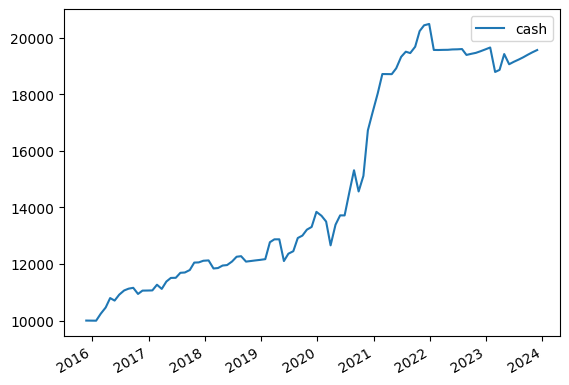

In [ ]:
df_cash.plot()